In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import statsmodels.api as sm
import pandas as pd

from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("./data/Q1/Q1.data", delimiter ='\t')

In [3]:
genos = np.array(data.iloc[:, :-1])
pheno = np.array(data.iloc[:,-1])

In [4]:
n_snp = genos.shape[1]
n_individual = genos.shape[0]
p_values = np.zeros((n_snp,))
for i in range(n_snp):
    x = genos[:,i]
    y = pheno.copy()
    x = sm.add_constant(x)
    mod = sm.OLS(y,x)
    res = mod.fit()
    p_values[i] = res.pvalues[1]

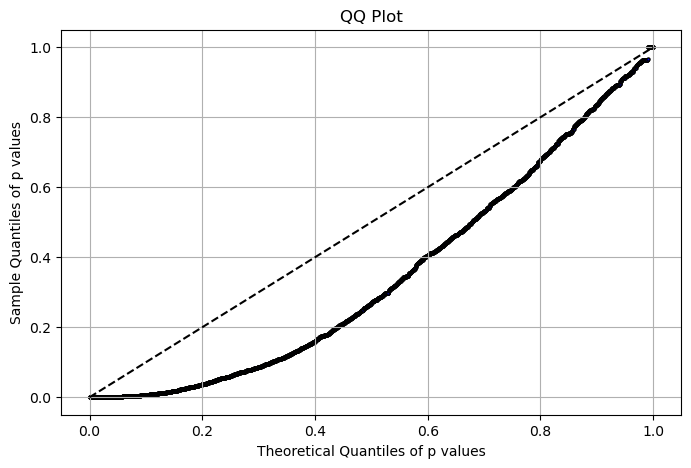

In [5]:
theoretical_quantiles = stats.uniform.ppf(np.linspace(0.0001, 0.9999, p_values.shape[0]))
sorted_p = np.sort(p_values)

plt.figure(figsize=(8, 5))
plt.scatter(theoretical_quantiles, sorted_p, c='b', marker='o', edgecolors='k',s = 5)
plt.plot([0, 1], [0, 1], 'k--')
plt.title(f'QQ Plot')
plt.xlabel('Theoretical Quantiles of p values')
plt.ylabel('Sample Quantiles of p values')
plt.grid(True)
plt.show()

In [6]:
# yes, inflation

In [7]:
alpha = 0.05
rejected = p_values < alpha/n_snp
rejected_number = np.sum(rejected)

In [8]:
print(rejected_number)

14


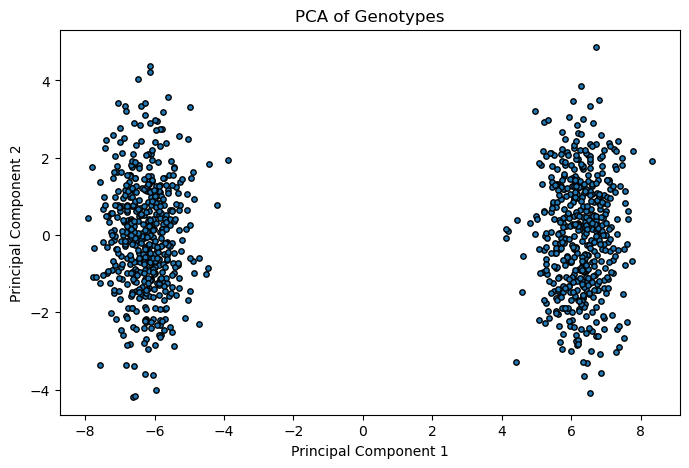

In [9]:
pca = PCA(n_components=2)  # You can choose the number of components you want
genos_pca = pca.fit_transform(genos)

plt.figure(figsize=(8, 5))
plt.scatter(genos_pca[:, 0], genos_pca[:, 1], edgecolor='k', s=15)
plt.title('PCA of Genotypes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [10]:
# two populations

In [11]:
PC1 = genos_pca[:, 0].reshape(-1,1)
n_snp = genos.shape[1]
n_individual = genos.shape[0]
p_values_corrected = np.zeros((n_snp,))
for i in range(n_snp):
    x = genos[:,i].reshape(-1,1)
    x = np.concatenate((x, PC1), axis=1)
    y = pheno.copy()
    x = sm.add_constant(x)
    mod = sm.OLS(y,x)
    res = mod.fit()
    p_values_corrected[i] = res.pvalues[1]

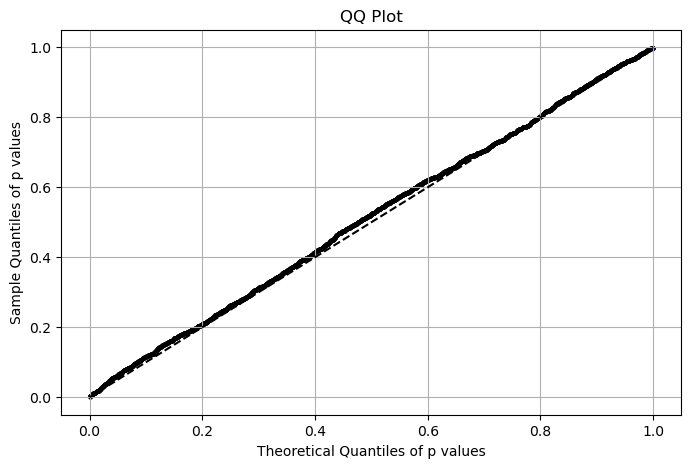

In [12]:
theoretical_quantiles2 = stats.uniform.ppf(np.linspace(0.0001, 0.9999, p_values.shape[0]))
sorted_p_corrected = np.sort(p_values_corrected)

plt.figure(figsize=(8, 5))
plt.scatter(theoretical_quantiles2, sorted_p_corrected, c='b', marker='o', edgecolors='k',s = 5)
plt.plot([0, 1], [0, 1], 'k--')
plt.title(f'QQ Plot')
plt.xlabel('Theoretical Quantiles of p values')
plt.ylabel('Sample Quantiles of p values')
plt.grid(True)
plt.show()

In [13]:
alpha = 0.05
rejected = p_values_corrected < alpha/n_snp
rejected_number = np.sum(rejected)

In [14]:
print(rejected_number)

0
